In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.style.use('seaborn') # pretty matplotlib plots

import random
import string
import statistics

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/jacobc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jacobc/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Part 1: Bag-of-Words

In [2]:
x_train_df = pd.read_csv('data/data_reviews/x_train.csv')
y_train_df = pd.read_csv('data/data_reviews/y_train.csv')
x_test_df = pd.read_csv('data/data_reviews/x_test.csv')

tr_text_list = x_train_df['text'].values.tolist()
# for text in tr_text_list:
#     print(text)

In [3]:
n = 18

a = 100*n + 90
b = 100*n + 105

tr_text_list[a:b]

["Based on the sub-par service I received and no effort to show their gratitude for my business I won't be going back.",
 'The worst was the salmon sashimi.',
 'Would not recommend to others.',
 "Don't do it!!!!",
 'It sure does beat the nachos at the movies but I would expect a little bit more coming from a restaurant.',
 "I'm not sure how long we stood there but it was long enough for me to begin to feel awkwardly out of place.",
 'What did bother me, was the slow service.',
 'i felt insulted and disrespected, how could you talk and judge another human being like that?',
 'I was shocked because no signs indicate cash only.',
 'Not my thing.',
 'This place lacked style!!',
 'I left with a stomach ache and felt sick the rest of the day.',
 'Service sucks.',
 'I had the chicken Pho and it tasted very bland.',
 'Nothing special.']

In [4]:
x_train_df.head()

,website_name,text
0,amazon,Oh and I forgot to also mention the weird colo...
1,amazon,THAT one didn't work either.
2,amazon,Waste of 13 bucks.
3,amazon,"Product is useless, since it does not have eno..."
4,amazon,None of the three sizes they sent with the hea...


In [5]:
y_train_df.head()

,is_positive_sentiment
0,0
1,0
2,0
3,0
4,0


### Searching data for specific words

## Preprocessing data (made in steps with pipeline)

### Tasks:

- ~~take out punctuation (replace with spaces)~~
- ~~make everything lowercase~~
- ~~remove ellipses of 3,4,5 dots~~
- ~~remove numbers (rank, ordering, other representaitons of numbers + often referencing model numbers)~~
- ~~remove slang~~

In [6]:
# sentences to words + lowercase
tokens = []
from nltk.tokenize import word_tokenize

for i in tr_text_list:
    j = str.lower(i)
    tokens.append(word_tokenize(j))

In [7]:
words = []
for sub in tokens:
    for i in sub:
        words.append(i)

In [8]:
words = np.unique(np.asarray(words))
words = list(words)

In [9]:
# extract conjunctions, prepositions and articles from top 100 words in english language
# from Oxford English Corpus (search for this term in a wikipedia page on the top 100 english words)
top = pd.read_csv('data/top.csv')
top['POS'] = top['POS'].str.lower()

top = top[(top['POS'].str.contains(pat = 'preposition')) | (top['POS'].str.contains(pat = 'conjunction')) | (top['POS'].str.contains(pat = 'article'))]
stop_list = list(top['word'].to_numpy())

In [10]:
stop_list

['the',
 'to',
 'of',
 'and',
 'a',
 'in',
 'that',
 'for',
 'on',
 'with',
 'as',
 'at',
 'but',
 'by',
 'from',
 'or',
 'an',
 'so',
 'up',
 'out',
 'if',
 'about',
 'like',
 'into',
 'than',
 'now',
 'over',
 'after',
 'because']

In [11]:
slang = ['lol','rofl','lmao','wtf','tf','lolol','smh','np','ymmv','idk']
ellip = ['.','..','...','....','.....',' . ',' .. ',' ... ',' .... ',' ..... ']
i = words
paren = ['(',')','()']

for j in i:
    # remove punctuation
    if j in word_tokenize(string.punctuation) or j in paren:
        i.remove(j)
    # slang
    if j in slang:
        i.remove(j)
    # ellipses
    if j in ellip:
        i.remove(j)
    # remove numbers
    if any(char.isdigit() for char in j):
        i.remove(j)
    # remove common stopwords
    if j in stop_list:
        i.remove(j)
    # remove numbers
    if not isinstance(j, str):
        i.remove(j)

In [12]:
n = 1

a = 100*n + 90
b = 100*n + 105

words[a:b]

# based on what you see in the first 500 words, take out ///
# words that contain apostrophes and other weird punctuation

['amateurish',
 'amaze',
 'amazed',
 'amazing',
 'amazingly',
 'amazon',
 'ambiance',
 'ambience',
 'america',
 'american',
 'americans',
 'among',
 'amount',
 'amp',
 'ample']

In [13]:
len(words)

4579

In [14]:
# for each sentence, make sure the sentence contains only the words in the wordlist

tr_text_new = []
for i in tr_text_list:
    j = word_tokenize(i)
    for w in j:
        if j not in words:
            j.remove(w)
    tr_text_new.append(' '.join(word for word in j))

In [15]:
vectorizer = CountVectorizer()

In [16]:
X = vectorizer.fit_transform(tr_text_new)

In [17]:
# find maximum global word count
a = list(np.asarray(X.sum(axis=0))[0])

In [18]:
train = X.toarray()
train = np.divide(train,max(a))

In [19]:
# saving vocabulary for test data
vocab = vectorizer.vocabulary_

# #1, cross validation

In [85]:
np.unique(x_train_df['website_name'].values.tolist())

array(['amazon', 'imdb', 'yelp'], dtype='<U6')

In [86]:
# creating data for cross validation

x_train = train
y_train = y_train_df['is_positive_sentiment'].to_numpy()

x_train, y_train = shuffle(x_train,y_train,random_state=561)

x_3 = np.split(x_train,3)
y_3 = np.split(y_train,3)

x_6 = np.split(x_train,6)
y_6 = np.split(y_train,6)

## #1, Models

In [87]:
# Logistic - See HW 3

# 2 MODELS
# one with 3 folds, and one with 6 folds

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

C_grid = np.logspace(-9, 17, 31)
# NOTE: for original C_grid, values for log loss were too large, but this value diminished
# significantly by changing C_grid to new values

# Round 1

loss_1 = []
for t in range(len(x_3)):

    data_x = x_3.copy()
    data_y = y_3.copy()

    v_x = data_x.pop(t)
    v_y = data_y.pop(t)

    tr_x = np.concatenate(data_x)
    tr_y = np.concatenate(data_y)

    train_list = []
    valid_list = []

    for C_value in C_grid:

        log_model = LogisticRegression(solver='liblinear',C = C_value)
        fitted = log_model.fit(tr_x,tr_y)

        train_predict = log_model.predict(tr_x)
        valid_predict = log_model.predict(v_x)

        train_loss = sklearn.metrics.zero_one_loss(tr_y,train_predict)
        valid_loss = sklearn.metrics.zero_one_loss(v_y, valid_predict)

        train_list.append(train_loss)
        valid_list.append(valid_loss)

    loss_list = [train_list,valid_list]
    loss_1.append(loss_list)

loss_obj = zip(*loss_1)
loss_list = list(loss_obj)

t_loss = list(zip(*loss_list[0]))
v_loss = list(zip(*loss_list[1]))

t_avg_3 = []
t_std_3 = []
for i in t_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    t_avg_3.append(a)
    t_std_3.append(b)

v_avg_3 = []
v_std_3 = []
for i in v_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    v_avg_3.append(a)
    v_std_3.append(b)



# Round 2

loss_2 = []
for t in range(len(x_6)):

    data_x = x_6.copy()
    data_y = y_6.copy()

    v_x = data_x.pop(t)
    v_y = data_y.pop(t)

    tr_x = np.concatenate(data_x)
    tr_y = np.concatenate(data_y)

    train_list = []
    valid_list = []

    for C_value in C_grid:

        log_model = LogisticRegression(solver='liblinear',C = C_value)
        fitted = log_model.fit(tr_x,tr_y)

        train_predict = log_model.predict(tr_x)
        valid_predict = log_model.predict(v_x)

        train_loss = sklearn.metrics.zero_one_loss(tr_y,train_predict)
        valid_loss = sklearn.metrics.zero_one_loss(v_y, valid_predict)

        train_list.append(train_loss)
        valid_list.append(valid_loss)

    loss_list = [train_list,valid_list]
    loss_2.append(loss_list)

loss_obj = zip(*loss_2)
loss_list = list(loss_obj)

t_loss = list(zip(*loss_list[0]))
v_loss = list(zip(*loss_list[1]))

t_avg_6 = []
t_std_6 = []
for i in t_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    t_avg_6.append(a)
    t_std_6.append(b)

v_avg_6 = []
v_std_6 = []
for i in v_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    v_avg_6.append(a)
    v_std_6.append(b)

t_log = [t_avg_3,t_avg_6]
t_sd_log = [t_std_3,t_std_6]

v_log = [v_avg_3,v_avg_6]
v_sd_log = [v_std_3,v_std_6]

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


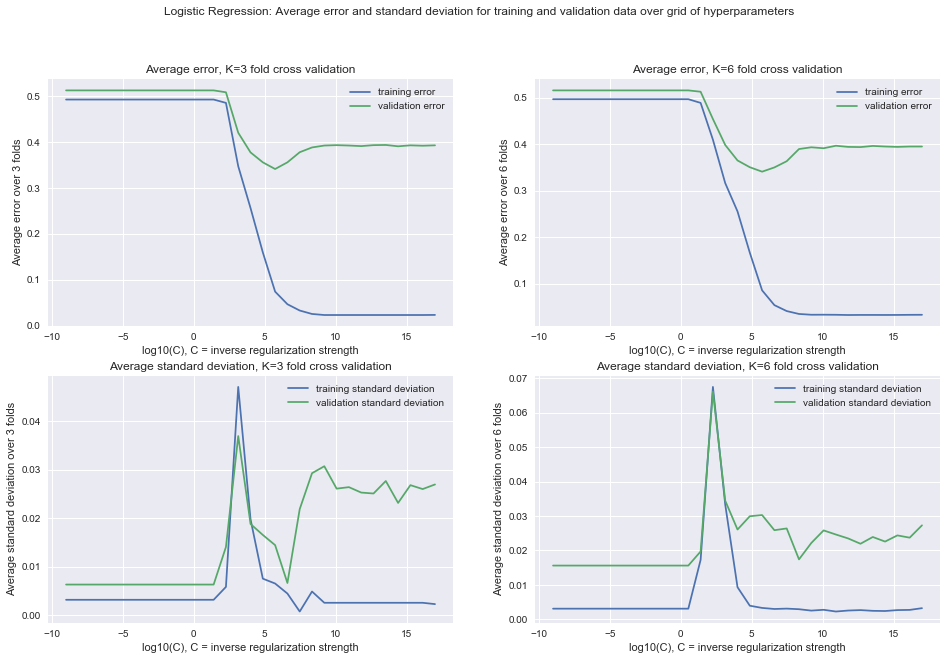

In [88]:
# PLOT (logistic)

fig, axs = plt.subplots(2, 2,figsize =(16,10))
axs[0,0].plot(np.log10(C_grid), t_log[0],label='training error')
axs[0,0].plot(np.log10(C_grid), v_log[0],label='validation error')

axs[0,1].plot(np.log10(C_grid), t_log[1],label='training error')
axs[0,1].plot(np.log10(C_grid), v_log[1],label='validation error')

axs[1,0].plot(np.log10(C_grid), t_sd_log[0],label='training standard deviation')
axs[1,0].plot(np.log10(C_grid), v_sd_log[0],label='validation standard deviation')

axs[1,1].plot(np.log10(C_grid), t_sd_log[1],label='training standard deviation')
axs[1,1].plot(np.log10(C_grid), v_sd_log[1],label='validation standard deviation')




axs[0,0].set_xlabel('log10(C), C = inverse regularization strength')
axs[0,0].set_ylabel('Average error over 3 folds')
axs[0,0].set_title("Average error, K=3 fold cross validation")

axs[0,1].set_xlabel('log10(C), C = inverse regularization strength')
axs[0,1].set_ylabel('Average error over 6 folds')
axs[0,1].set_title("Average error, K=6 fold cross validation")

axs[1,0].set_xlabel('log10(C), C = inverse regularization strength')
axs[1,0].set_ylabel('Average standard deviation over 3 folds')
axs[1,0].set_title("Average standard deviation, K=3 fold cross validation")

axs[1,1].set_xlabel('log10(C), C = inverse regularization strength')
axs[1,1].set_ylabel('Average standard deviation over 6 folds')
axs[1,1].set_title("Average standard deviation, K=6 fold cross validation")



fig.suptitle("Logistic Regression: Average error and standard deviation for training and validation data over grid of hyperparameters")

for i in [0,1]:
    for j in [0,1]:
        axs[i,j].legend()

plt.savefig('log_bow.png')
plt.show()

In [89]:
# MPC/neural network
# See HW 4

from sklearn.neural_network import MLPClassifier

alphas = [x for x in range(10,700,20)]
alphas = list(np.divide(np.asarray(alphas),10000))



# Round 1

loss_1 = []
for t in range(len(x_3)):

    data_x = x_3.copy()
    data_y = y_3.copy()

    v_x = data_x.pop(t)
    v_y = data_y.pop(t)

    tr_x = np.concatenate(data_x)
    tr_y = np.concatenate(data_y)

    train_list = []
    valid_list = []

    for a in alphas:

        mlp_sgd = MLPClassifier(
            hidden_layer_sizes=[2],
            activation='logistic',
            alpha=a, # hyperparameter to vary
            tol=1e-8,
            max_iter = 400,
            solver='lbfgs', batch_size=10,
            learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
            )

        NN = mlp_sgd.fit(tr_x, tr_y)

        NN_t_predict = NN.predict(tr_x)
        NN_v_predict = NN.predict(v_x)

        NN_t_error = sklearn.metrics.zero_one_loss(tr_y,NN_t_predict)
        NN_v_error = sklearn.metrics.zero_one_loss(v_y,NN_v_predict)

        train_list.append(NN_t_error)
        valid_list.append(NN_v_error)

    loss_list = [train_list,valid_list]
    loss_1.append(loss_list)


loss_obj = zip(*loss_1)
loss_list = list(loss_obj)

t_loss = list(zip(*loss_list[0]))
v_loss = list(zip(*loss_list[1]))

t_avg_3 = []
t_std_3 = []
for i in t_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    t_avg_3.append(a)
    t_std_3.append(b)

v_avg_3 = []
v_std_3 = []
for i in v_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    v_avg_3.append(a)
    v_std_3.append(b)






# Round 2

loss_2 = []
for t in range(len(x_6)):

    data_x = x_6.copy()
    data_y = y_6.copy()

    v_x = data_x.pop(t)
    v_y = data_y.pop(t)

    tr_x = np.concatenate(data_x)
    tr_y = np.concatenate(data_y)

    train_list = []
    valid_list = []

    for a in alphas:

        mlp_sgd = MLPClassifier(
            hidden_layer_sizes=[2],
            activation='logistic',
            alpha=a, # hyperparameter to vary
            tol=1e-8,
            max_iter = 400,
            solver='lbfgs', batch_size=10,
            learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
            )

        NN = mlp_sgd.fit(tr_x, tr_y)

        NN_t_predict = NN.predict(tr_x)
        NN_v_predict = NN.predict(v_x)

        NN_t_error = sklearn.metrics.zero_one_loss(tr_y,NN_t_predict)
        NN_v_error = sklearn.metrics.zero_one_loss(v_y,NN_v_predict)

        train_list.append(NN_t_error)
        valid_list.append(NN_v_error)

    loss_list = [train_list,valid_list]
    loss_2.append(loss_list)


loss_obj = zip(*loss_2)
loss_list = list(loss_obj)

t_loss = list(zip(*loss_list[0]))
v_loss = list(zip(*loss_list[1]))

t_avg_6 = []
t_std_6 = []
for i in t_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    t_avg_6.append(a)
    t_std_6.append(b)

v_avg_6 = []
v_std_6 = []
for i in v_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    v_avg_6.append(a)
    v_std_6.append(b)

t_NN = [t_avg_3,t_avg_6]
t_sd_NN = [t_std_3,t_std_6]

v_NN = [v_avg_3,v_avg_6]
v_sd_NN = [v_std_3,v_std_6]

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


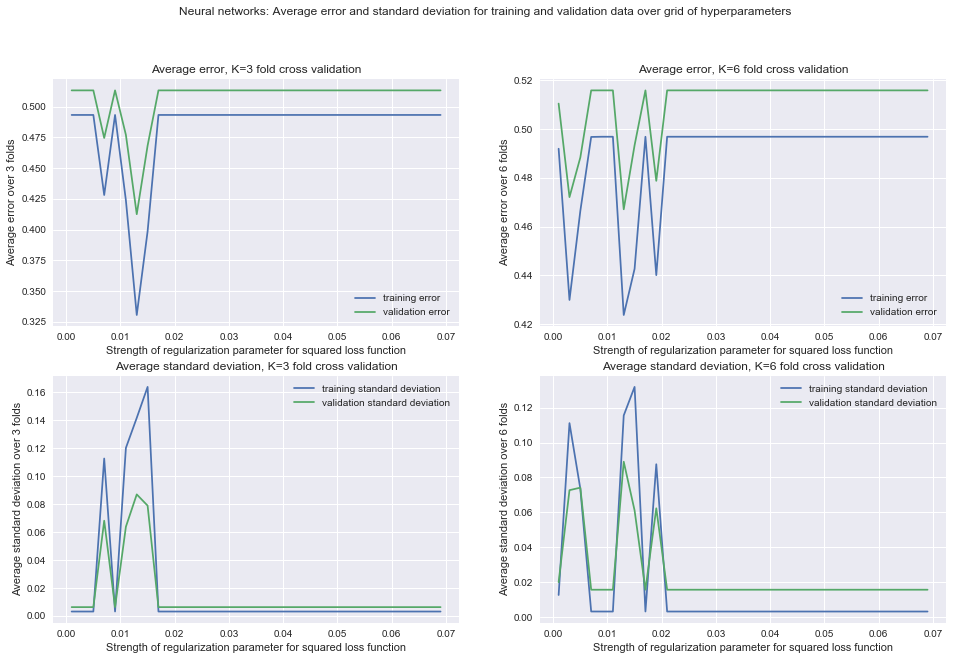

In [90]:
# PLOT (NN)

fig, axs = plt.subplots(2, 2,figsize =(16,10))

for i in [0,1]:
    axs[0,i].plot(alphas, t_NN[i],label='training error')
    axs[0,i].plot(alphas, v_NN[i],label='validation error')

for i in [0,1]:
    axs[1,i].plot(alphas, t_sd_NN[i],label='training standard deviation')
    axs[1,i].plot(alphas, v_sd_NN[i],label='validation standard deviation')



axs[0,0].set_xlabel('Strength of regularization parameter for squared loss function')
axs[0,0].set_ylabel('Average error over 3 folds')
axs[0,0].set_title("Average error, K=3 fold cross validation")

axs[0,1].set_xlabel('Strength of regularization parameter for squared loss function')
axs[0,1].set_ylabel('Average error over 6 folds')
axs[0,1].set_title("Average error, K=6 fold cross validation")

axs[1,0].set_xlabel('Strength of regularization parameter for squared loss function')
axs[1,0].set_ylabel('Average standard deviation over 3 folds')
axs[1,0].set_title("Average standard deviation, K=3 fold cross validation")

axs[1,1].set_xlabel('Strength of regularization parameter for squared loss function')
axs[1,1].set_ylabel('Average standard deviation over 6 folds')
axs[1,1].set_title("Average standard deviation, K=6 fold cross validation")



fig.suptitle("Neural networks: Average error and standard deviation for training and validation data over grid of hyperparameters")

for i in [0,1]:
    for j in [0,1]:
        axs[i,j].legend()

plt.savefig('NN_bow.png')
plt.show()

In [91]:
# THIRD MODEL: decision tree

from sklearn.tree import DecisionTreeClassifier

depths = [x for x in range(50,1050,50)]

# Round 1

loss_1 = []
for t in range(len(x_3)):

    data_x = x_3.copy()
    data_y = y_3.copy()

    v_x = data_x.pop(t)
    v_y = data_y.pop(t)

    tr_x = np.concatenate(data_x)
    tr_y = np.concatenate(data_y)

    train_list = []
    valid_list = []

    for d in depths:

        tree = DecisionTreeClassifier(criterion='entropy',max_depth=d)
        tree_fit = tree.fit(tr_x,tr_y)

        tree_train_predict = tree_fit.predict(tr_x)
        tree_valid_predict = tree_fit.predict(v_x)

        tr_loss = sklearn.metrics.zero_one_loss(tr_y,tree_train_predict)
        v_loss = sklearn.metrics.zero_one_loss(v_y,tree_valid_predict)

        train_list.append(tr_loss)
        valid_list.append(v_loss)



    loss_list = [train_list,valid_list]
    loss_1.append(loss_list)


loss_obj = zip(*loss_1)
loss_list = list(loss_obj)

t_loss = list(zip(*loss_list[0]))
v_loss = list(zip(*loss_list[1]))

t_avg_3 = []
t_std_3 = []
for i in t_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    t_avg_3.append(a)
    t_std_3.append(b)

v_avg_3 = []
v_std_3 = []
for i in v_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    v_avg_3.append(a)
    v_std_3.append(b)





# Round 2

loss_2 = []
for t in range(len(x_6)):

    data_x = x_6.copy()
    data_y = y_6.copy()

    v_x = data_x.pop(t)
    v_y = data_y.pop(t)

    tr_x = np.concatenate(data_x)
    tr_y = np.concatenate(data_y)

    train_list = []
    valid_list = []

    for d in depths:

        tree = DecisionTreeClassifier(criterion='entropy',max_depth=d)
        tree_fit = tree.fit(tr_x,tr_y)

        tree_train_predict = tree_fit.predict(tr_x)
        tree_valid_predict = tree_fit.predict(v_x)

        tr_loss = sklearn.metrics.zero_one_loss(tr_y,tree_train_predict)
        v_loss = sklearn.metrics.zero_one_loss(v_y,tree_valid_predict)

        train_list.append(tr_loss)
        valid_list.append(v_loss)

    loss_list = [train_list,valid_list]
    loss_2.append(loss_list)

loss_obj = zip(*loss_2)
loss_list = list(loss_obj)

t_loss = list(zip(*loss_list[0]))
v_loss = list(zip(*loss_list[1]))

t_avg_6 = []
t_std_6 = []
for i in t_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    t_avg_6.append(a)
    t_std_6.append(b)

v_avg_6 = []
v_std_6 = []
for i in v_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    v_avg_6.append(a)
    v_std_6.append(b)

t_tree = [t_avg_3,t_avg_6]
t_sd_tree = [t_std_3,t_std_6]

v_tree = [v_avg_3,v_avg_6]
v_sd_tree = [v_std_3,v_std_6]

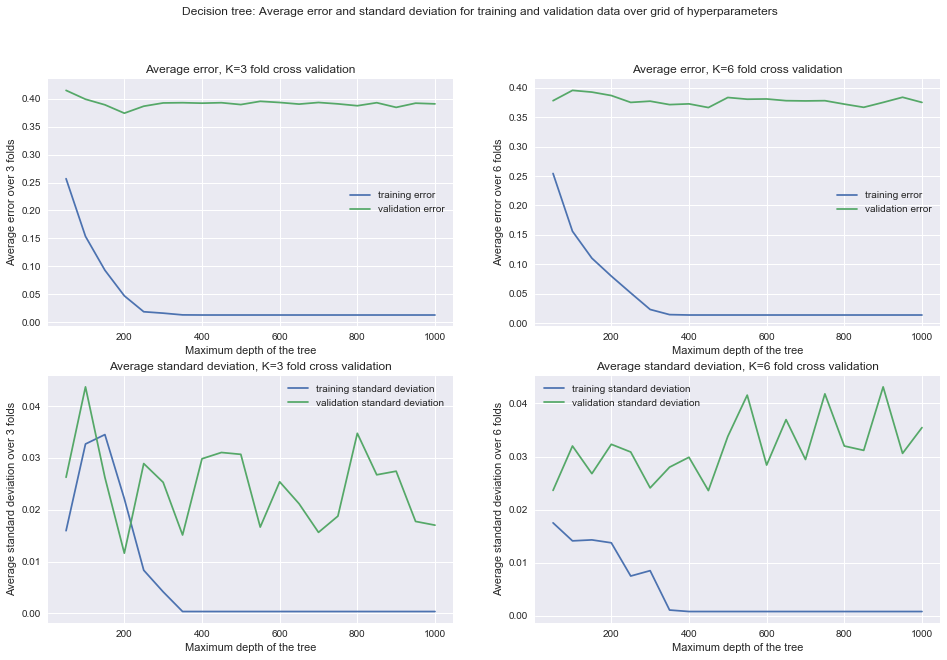

In [92]:
# PLOT (decision tree)

fig, axs = plt.subplots(2, 2,figsize =(16,10))

for i in [0,1]:
    axs[0,i].plot(depths, t_tree[i],label='training error')
    axs[0,i].plot(depths, v_tree[i],label='validation error')

for i in [0,1]:
    axs[1,i].plot(depths, t_sd_tree[i],label='training standard deviation')
    axs[1,i].plot(depths, v_sd_tree[i],label='validation standard deviation')



axs[0,0].set_xlabel('Maximum depth of the tree')
axs[0,0].set_ylabel('Average error over 3 folds')
axs[0,0].set_title("Average error, K=3 fold cross validation")

axs[0,1].set_xlabel('Maximum depth of the tree')
axs[0,1].set_ylabel('Average error over 6 folds')
axs[0,1].set_title("Average error, K=6 fold cross validation")

axs[1,0].set_xlabel('Maximum depth of the tree')
axs[1,0].set_ylabel('Average standard deviation over 3 folds')
axs[1,0].set_title("Average standard deviation, K=3 fold cross validation")

axs[1,1].set_xlabel('Maximum depth of the tree')
axs[1,1].set_ylabel('Average standard deviation over 6 folds')
axs[1,1].set_title("Average standard deviation, K=6 fold cross validation")



fig.suptitle("Decision tree: Average error and standard deviation for training and validation data over grid of hyperparameters")

for i in [0,1]:
    for j in [0,1]:
        axs[i,j].legend()

plt.savefig('tree_bow.png')
plt.show()

In [93]:
# finding the best model

log_min_t = [min(t_log[0]),min(t_log[1])]
log_min_v = [min(v_log[0]),min(v_log[1])]
log_min_flip_t = [ v_log[0][t_log[0].index(log_min_t[0])] , v_log[1][t_log[1].index(log_min_t[1])] ] 
log_min_flip_v = [ t_log[0][v_log[0].index(log_min_v[0])] , t_log[1][v_log[1].index(log_min_v[1])] ] 

NN_min_t = [min(t_NN[0]),min(t_NN[1])]
NN_min_v = [min(v_NN[0]),min(v_NN[1])]
NN_min_flip_t = [ v_NN[0][t_NN[0].index(NN_min_t[0])] , v_NN[1][t_NN[1].index(NN_min_t[1])] ] 
NN_min_flip_v = [ t_NN[0][v_NN[0].index(NN_min_v[0])] , t_NN[1][v_NN[1].index(NN_min_v[1])] ]

tree_min_t = [min(t_tree[0]),min(t_tree[1])]
tree_min_v = [min(v_tree[0]),min(v_tree[1])]
tree_min_flip_t = [ v_tree[0][t_tree[0].index(tree_min_t[0])] , v_tree[1][t_tree[1].index(tree_min_t[1])] ] 
tree_min_flip_v = [ t_tree[0][v_tree[0].index(tree_min_v[0])] , t_tree[1][v_tree[1].index(tree_min_v[1])] ]




# seeing results for all models
print("LOGISTIC")
print(f"min training error, 3 folds {log_min_t[0]:.4f} | validation {log_min_flip_t[0]:.4f}")
print(f"min training error, 6 folds {log_min_t[1]:.4f} | validation {log_min_flip_t[1]:.4f}")
print(f"min validation error, 3 folds {log_min_v[0]:.4f} | training {log_min_flip_v[0]:.4f}")
print(f"min validation error, 6 folds {log_min_v[1]:.4f} | training {log_min_flip_v[1]:.4f}")

print("\n")

print("NN")
print(f"min training error, 3 folds {NN_min_t[0]:.4f} | validation {NN_min_flip_t[0]:.4f}")
print(f"min training error, 6 folds {NN_min_t[1]:.4f} | validation {NN_min_flip_t[1]:.4f}")
print(f"min validation error, 3 folds {NN_min_v[0]:.4f} | training {NN_min_flip_v[0]:.4f}")
print(f"min validation error, 6 folds {NN_min_v[1]:.4f} | training {NN_min_flip_v[1]:.4f}")

print("\n")

print("TREE")
print(f"min training error, 3 folds {tree_min_t[0]:.4f} | validation {tree_min_flip_t[0]:.4f}")
print(f"min training error, 6 folds {tree_min_t[1]:.4f} | validation {tree_min_flip_t[1]:.4f}")
print(f"min validation error, 3 folds {tree_min_v[0]:.4f} | training {tree_min_flip_v[0]:.4f}")
print(f"min validation error, 6 folds {tree_min_v[1]:.4f} | training {tree_min_flip_v[1]:.4f}")

# eyeball best model
# when discussing best model, discuss (1) minimum validation error, (2) min training error
# make sure to also discuss their graphs for standard deviations

LOGISTIC
min training error, 3 folds 0.0229 | validation 0.3929
min training error, 6 folds 0.0323 | validation 0.3942
min validation error, 3 folds 0.3417 | training 0.0740
min validation error, 6 folds 0.3408 | training 0.0853


NN
min training error, 3 folds 0.3304 | validation 0.4125
min training error, 6 folds 0.4238 | validation 0.4671
min validation error, 3 folds 0.4125 | training 0.3304
min validation error, 6 folds 0.4671 | training 0.4238


TREE
min training error, 3 folds 0.0127 | validation 0.3921
min training error, 6 folds 0.0138 | validation 0.3725
min validation error, 3 folds 0.3742 | training 0.0471
min validation error, 6 folds 0.3663 | training 0.0138


In [94]:
# run best model on testing x-data

# FOR THIS SET, best model is decision tree:  min validation error, 3 folds

best_hyper = depths[ v_tree[0].index(min(v_tree[0])) ]

tree = DecisionTreeClassifier(criterion='entropy',max_depth = best_hyper)
tree_fit = tree.fit(x_train,y_train)

In [95]:
best_hyper

200

In [43]:
# y-predictions for testing data
test_text = x_test_df['text']

for i in test_text:
    i = str.lower(i)
    
vectorizer = CountVectorizer(vocabulary=vocab)
X = vectorizer.fit_transform(test_text)
test = X.toarray()

# find maximum global word count
a = list(np.asarray(X.sum(axis=0))[0])

x_test = np.divide(test,max(a))

In [97]:
# # Load data into file for best classifier
y_test = tree_fit.predict_proba(x_test)
np.savetxt('yproba1_test_bow.txt', y_test[:,1])

In [98]:
# TEST THE LOAD
len(np.loadtxt('yproba1_test_bow.txt'))

600

In [100]:
# Looking at mistakes of best classifier
# CHANGE PREDICT BASED ON MODEL YOU NEED
predict = tree_fit.predict(x_train)

from statistics import mean

print(np.unique(x_train_df['website_name'].values.tolist()))

# confusion matrix
print("CONFUSION MATRIX \n")
print(sklearn.metrics.confusion_matrix(y_train,predict))

# df of wrongly predicted 
wrong_predict = x_train_df[y_train != predict]


# length of sentences (summary stats): total, by website count
sent_length = []
for web in np.unique(x_train_df['website_name'].values.tolist()):
    df = wrong_predict[wrong_predict['website_name'] == web]
    sent_length_web = []
    for i in list(df['text'].to_numpy()):
        j = word_tokenize(i)
        length = len(j)
        sent_length_web.append(length)
    sent_length.append(sent_length_web)
    
print("\n LENGTH OF SENTENCES: by website \n")
for i in sent_length:
    print(pd.DataFrame(i).describe())
          
print("\n LENGTH OF SENTENCES: total")
print(pd.DataFrame([item for sublist in sent_length for item in sublist]).describe())



# length of words (summary stats): total, by website count
word_length = []
for web in np.unique(x_train_df['website_name'].values.tolist()):
    df = wrong_predict[wrong_predict['website_name'] == web]
    
    word_length_web = []
    for i in list(df['text'].to_numpy()):
        j = word_tokenize(i)
        avg = mean([len(k) for k in j])
        word_length_web.append(avg)
    
    word_length.append(word_length_web)
    
print("\n AVERAGE LENGTH OF WORDS: by website \n")
for i in word_length:
    print(pd.DataFrame(i).describe())
          
print("\n AVERAGE LENGTH OF WORDS: total")
print(pd.DataFrame([item for sublist in word_length for item in sublist]).describe())
        



# ratio of common words (same as data cleaning process) to all words: total, by website count
common_ratio = []
for web in np.unique(x_train_df['website_name'].values.tolist()):
    df = wrong_predict[wrong_predict['website_name'] == web]
    
    common_ratio_web = []
    for i in list(df['text'].to_numpy()):
        count = len([x for x in nltk.pos_tag(i) if (x[1] == 'CC') or (x[1] == 'IN') or (x[1] == 'DT')])
        ratio = count/len(word_tokenize(i))
        common_ratio_web.append(ratio)
        
    common_ratio.append(common_ratio_web)
                     
                     
print("\n RATIO OF COMMON WORDS TO ALL WORDS: by website \n")
for i in common_ratio:
    print(pd.DataFrame(i).describe())
          
print("\n RATIO OF COMMON WORDS TO ALL WORDS: total")
print(pd.DataFrame([item for sublist in common_ratio for item in sublist]).describe())

print("\n wesite analysis")
wrong_predict.groupby('website_name').count()

['amazon' 'imdb' 'yelp']
CONFUSION MATRIX 

[[1190   10]
 [ 210  990]]

 LENGTH OF SENTENCES: by website 

               0
count  80.000000
mean   11.200000
std     7.323277
min     3.000000
25%     5.000000
50%     9.000000
75%    16.250000
max    33.000000
               0
count  72.000000
mean   16.347222
std    10.340893
min     3.000000
25%     8.000000
50%    13.000000
75%    24.000000
max    50.000000
               0
count  68.000000
mean   12.426471
std     6.282685
min     3.000000
25%     7.750000
50%    11.000000
75%    16.000000
max    30.000000

 LENGTH OF SENTENCES: total
                0
count  220.000000
mean    13.263636
std      8.425529
min      3.000000
25%      7.000000
50%     11.000000
75%     18.250000
max     50.000000

 AVERAGE LENGTH OF WORDS: by website 

               0
count  80.000000
mean    4.050777
std     0.836247
min     2.166667
25%     3.493421
50%     3.970588
75%     4.459330
max     6.500000
               0
count  72.000000
mean    3.904973

,text
website_name,
amazon,80
imdb,72
yelp,68


# Part 2: word embeddings

In [45]:
from collections import OrderedDict
import sklearn.neighbors

word_embeddings = pd.read_csv('data/pretrained_word_embeddings/glove.6B.50d.txt.zip',
                               header=None, sep=' ', index_col=0,
                               nrows=100000, compression='zip', encoding='utf-8', quoting=3)
# Build a dict that will map from string word to 50-dim vector
word_list = word_embeddings.index.values.tolist()
word2vec = OrderedDict(zip(word_list, word_embeddings.values))

## Show some examples
n_words = len(word2vec.keys())
print("word2vec['london'] = ")
print(word2vec['london'])

print("word2vec['england'] = ")
print(word2vec['england'])

## Try some analogies
def analogy_lookup(a1, a2, b1):
    target_vec = word2vec[a2] - word2vec[a1] + word2vec[b1]
    knn = sklearn.neighbors.NearestNeighbors(n_neighbors=7, metric='euclidean', algorithm='brute')
    knn.fit(word_embeddings.values)
    dists, indices = knn.kneighbors(target_vec[np.newaxis,:])
    print("Query: %s:%s -> %s:____" % (a1, a2, b1))
    for ii, vv in enumerate(indices[0]):
        print("   %20s  at dist %.3f" % (word_list[vv], dists[0,ii]))

analogy_lookup('england', 'london', 'france')
analogy_lookup('england', 'london', 'germany')
analogy_lookup('england', 'london', 'japan')
analogy_lookup('england', 'london', 'indonesia')

analogy_lookup('swim', 'swimming', 'run')

word2vec['london'] = 
[ 0.032886   0.99637   -0.6975    -0.58375    0.053403  -0.35758
 -0.96735   -0.048156  -0.23417   -0.31642   -0.080246   0.0075121
 -0.69211   -0.19357    0.040528   0.74492    0.079019  -0.13893
 -1.5938     0.33824    2.5535     0.87576   -0.1597     0.85763
 -0.68158   -1.3948     0.13189    0.10129   -0.7461     0.67386
  2.5619    -0.19922    0.76751   -0.4867     0.39738   -0.6253
  0.63504   -0.1989    -0.0953    -0.22472    0.61698   -0.21968
  0.2584    -0.39371    0.47571    0.57736   -0.55713   -0.6259
  0.60789   -0.30978  ]
word2vec['england'] = 
[-3.6165e-01 -1.0607e-01 -1.1168e+00 -6.7270e-01 -1.6521e-01  6.8828e-02
 -1.1727e+00  7.1667e-01  1.6573e-01 -7.5759e-01 -1.4659e-01  3.5785e-01
 -6.9141e-01 -1.2047e+00  1.5224e-01  6.3566e-01  8.7442e-01 -6.1517e-01
 -1.7471e+00  3.5292e-01  2.2251e-02  3.8990e-01  2.0703e-02  7.4169e-01
  2.4097e-03 -1.3529e+00  5.8844e-01 -4.2970e-01 -5.1740e-01  6.2258e-01
  2.8153e+00  3.0152e-01  7.8742e-01 -7.9597e-

In [46]:
# CREATING THE DICTIONARY

# OrderedDict as list
d_list = list(word2vec.items())

# trim vector dictionary to only include words that are in reviews
d_list_trim = [x for x in d_list if x[0] in words]

In [47]:
# loop over all items in list of reviews - TRAINING DATA

train_vectors = []
for r in tr_text_list:
    
    # assemble weight vector
    tokens = nltk.word_tokenize(str.lower(r))
    vector_names = [y[0] for y in d_list_trim if y[0] in tokens]
    tokens = [x for x in vector_names if x in tokens]

    w = [1 for x in range(len(tokens))]
    for j in tokens:
        pos = nltk.pos_tag(j)
        if (pos == 'CC') or (pos == 'IN') or (pos == 'DT'):
            w[tokens.index(j)] = 0.15
        elif j in word_tokenize(string.punctuation) or (j in slang) or (j in stop_list):
            w[tokens.index(j)] = 0.05

    # create weight vector and change weights
    weights = np.divide(np.asarray(w),np.sum(np.asarray(w)))

    # collect embedding vector for each of the tokens

    vectors = [y[1] for y in d_list_trim if y[0] in tokens]
    weighted_vectors = np.multiply(vectors,np.reshape(weights,(len(weights),1)))
    final_vector = np.sum(weighted_vectors, axis=0)
    
    train_vectors.append(final_vector)
    
for x in [x for x,y in enumerate(train_vectors) if np.size(y)!=50]:
    train_vectors[x] = np.zeros(50,)

In [48]:
len(vector_names),len(tokens)

(5, 5)

In [49]:
len(tr_text_list), len(train_vectors)

(2400, 2400)

In [50]:
empty_vecs = [x for x in train_vectors if len(x)==0]
empty_index = [x for x,y in enumerate(train_vectors) if len(y)==0]

In [51]:
len(empty_vecs),len(empty_index)

(0, 0)

In [52]:
empty_index

[]

In [53]:
[tr_text_list[x] for x in empty_index]

[]

# #2 - Cross validation

In [54]:
train_embeddings = np.stack(train_vectors)

In [55]:
# creating data for cross validation

x_train = train_embeddings
y_train = y_train_df['is_positive_sentiment'].to_numpy()

x_train, y_train = shuffle(x_train,y_train,random_state=561)

x_3 = np.split(x_train,3)
y_3 = np.split(y_train,3)

x_6 = np.split(x_train,6)
y_6 = np.split(y_train,6)

# #2 - Models

In [56]:
# Logistic - See HW 3

# 2 MODELS
# one with 3 folds, and one with 6 folds

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

C_grid = np.logspace(-9, 17, 31)
# NOTE: for original C_grid, values for log loss were too large, but this value diminished
# significantly by changing C_grid to new values

# Round 1

loss_1 = []
for t in range(len(x_3)):

    data_x = x_3.copy()
    data_y = y_3.copy()
    
    v_x = data_x.pop(t)
    v_y = data_y.pop(t)
    
    tr_x = np.concatenate(data_x)
    tr_y = np.concatenate(data_y)
    
    train_list = []
    valid_list = []
    
    for C_value in C_grid:
        
        log_model = LogisticRegression(solver='liblinear',C = C_value)
        fitted = log_model.fit(tr_x,tr_y)
        
        train_predict = log_model.predict(tr_x)
        valid_predict = log_model.predict(v_x)

        train_loss = sklearn.metrics.zero_one_loss(tr_y,train_predict)
        valid_loss = sklearn.metrics.zero_one_loss(v_y, valid_predict)

        train_list.append(train_loss)
        valid_list.append(valid_loss)
        
    loss_list = [train_list,valid_list]
    loss_1.append(loss_list)
    
loss_obj = zip(*loss_1)
loss_list = list(loss_obj)

t_loss = list(zip(*loss_list[0]))
v_loss = list(zip(*loss_list[1]))

t_avg_3 = []
t_std_3 = []
for i in t_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    t_avg_3.append(a)
    t_std_3.append(b)
    
v_avg_3 = []
v_std_3 = []
for i in v_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    v_avg_3.append(a)
    v_std_3.append(b)



# Round 2

loss_2 = []
for t in range(len(x_6)):

    data_x = x_6.copy()
    data_y = y_6.copy()
    
    v_x = data_x.pop(t)
    v_y = data_y.pop(t)
    
    tr_x = np.concatenate(data_x)
    tr_y = np.concatenate(data_y)
    
    train_list = []
    valid_list = []
    
    for C_value in C_grid:
        
        log_model = LogisticRegression(solver='liblinear',C = C_value)
        fitted = log_model.fit(tr_x,tr_y)
        
        train_predict = log_model.predict(tr_x)
        valid_predict = log_model.predict(v_x)

        train_loss = sklearn.metrics.zero_one_loss(tr_y,train_predict)
        valid_loss = sklearn.metrics.zero_one_loss(v_y, valid_predict)

        train_list.append(train_loss)
        valid_list.append(valid_loss)
        
    loss_list = [train_list,valid_list]
    loss_2.append(loss_list)
    
loss_obj = zip(*loss_2)
loss_list = list(loss_obj)

t_loss = list(zip(*loss_list[0]))
v_loss = list(zip(*loss_list[1]))

t_avg_6 = []
t_std_6 = []
for i in t_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    t_avg_6.append(a)
    t_std_6.append(b)
    
v_avg_6 = []
v_std_6 = []
for i in v_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    v_avg_6.append(a)
    v_std_6.append(b)
    
t_log = [t_avg_3,t_avg_6]
t_sd_log = [t_std_3,t_std_6]

v_log = [v_avg_3,v_avg_6]
v_sd_log = [v_std_3,v_std_6]

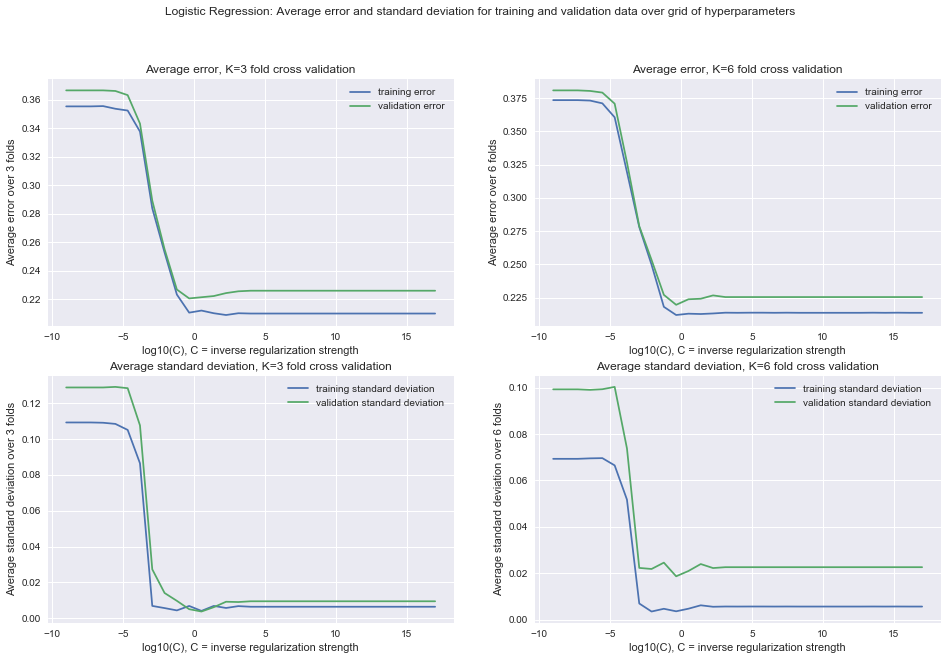

In [57]:
# PLOT (logistic)

fig, axs = plt.subplots(2, 2,figsize =(16,10))
axs[0,0].plot(np.log10(C_grid), t_log[0],label='training error')
axs[0,0].plot(np.log10(C_grid), v_log[0],label='validation error')

axs[0,1].plot(np.log10(C_grid), t_log[1],label='training error')
axs[0,1].plot(np.log10(C_grid), v_log[1],label='validation error')

axs[1,0].plot(np.log10(C_grid), t_sd_log[0],label='training standard deviation')
axs[1,0].plot(np.log10(C_grid), v_sd_log[0],label='validation standard deviation')

axs[1,1].plot(np.log10(C_grid), t_sd_log[1],label='training standard deviation')
axs[1,1].plot(np.log10(C_grid), v_sd_log[1],label='validation standard deviation')




axs[0,0].set_xlabel('log10(C), C = inverse regularization strength')
axs[0,0].set_ylabel('Average error over 3 folds')
axs[0,0].set_title("Average error, K=3 fold cross validation")

axs[0,1].set_xlabel('log10(C), C = inverse regularization strength')
axs[0,1].set_ylabel('Average error over 6 folds')
axs[0,1].set_title("Average error, K=6 fold cross validation")

axs[1,0].set_xlabel('log10(C), C = inverse regularization strength')
axs[1,0].set_ylabel('Average standard deviation over 3 folds')
axs[1,0].set_title("Average standard deviation, K=3 fold cross validation")

axs[1,1].set_xlabel('log10(C), C = inverse regularization strength')
axs[1,1].set_ylabel('Average standard deviation over 6 folds')
axs[1,1].set_title("Average standard deviation, K=6 fold cross validation")



fig.suptitle("Logistic Regression: Average error and standard deviation for training and validation data over grid of hyperparameters")

for i in [0,1]:
    for j in [0,1]:
        axs[i,j].legend()

plt.savefig('log_embed.png')
plt.show()

In [58]:
# MPC/neural network
# See HW 4

from sklearn.neural_network import MLPClassifier

alphas = [x for x in range(10,700,20)]
alphas = list(np.divide(np.asarray(alphas),10000))



# Round 1

loss_1 = []
for t in range(len(x_3)):

    data_x = x_3.copy()
    data_y = y_3.copy()

    v_x = data_x.pop(t)
    v_y = data_y.pop(t)

    tr_x = np.concatenate(data_x)
    tr_y = np.concatenate(data_y)

    train_list = []
    valid_list = []

    for a in alphas:

        mlp_sgd = MLPClassifier(
            hidden_layer_sizes=[2],
            activation='logistic',
            alpha=a, # hyperparameter to vary
            tol=1e-8,
            max_iter = 400,
            solver='lbfgs', batch_size=10,
            learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
            )

        NN = mlp_sgd.fit(tr_x, tr_y)

        NN_t_predict = NN.predict(tr_x)
        NN_v_predict = NN.predict(v_x)

        NN_t_error = sklearn.metrics.zero_one_loss(tr_y,NN_t_predict)
        NN_v_error = sklearn.metrics.zero_one_loss(v_y,NN_v_predict)

        train_list.append(NN_t_error)
        valid_list.append(NN_v_error)

    loss_list = [train_list,valid_list]
    loss_1.append(loss_list)


loss_obj = zip(*loss_1)
loss_list = list(loss_obj)

t_loss = list(zip(*loss_list[0]))
v_loss = list(zip(*loss_list[1]))

t_avg_3 = []
t_std_3 = []
for i in t_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    t_avg_3.append(a)
    t_std_3.append(b)

v_avg_3 = []
v_std_3 = []
for i in v_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    v_avg_3.append(a)
    v_std_3.append(b)






# Round 2

loss_2 = []
for t in range(len(x_6)):

    data_x = x_6.copy()
    data_y = y_6.copy()

    v_x = data_x.pop(t)
    v_y = data_y.pop(t)

    tr_x = np.concatenate(data_x)
    tr_y = np.concatenate(data_y)

    train_list = []
    valid_list = []

    for a in alphas:

        mlp_sgd = MLPClassifier(
            hidden_layer_sizes=[2],
            activation='logistic',
            alpha=a, # hyperparameter to vary
            tol=1e-8,
            max_iter = 400,
            solver='lbfgs', batch_size=10,
            learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
            )

        NN = mlp_sgd.fit(tr_x, tr_y)

        NN_t_predict = NN.predict(tr_x)
        NN_v_predict = NN.predict(v_x)

        NN_t_error = sklearn.metrics.zero_one_loss(tr_y,NN_t_predict)
        NN_v_error = sklearn.metrics.zero_one_loss(v_y,NN_v_predict)

        train_list.append(NN_t_error)
        valid_list.append(NN_v_error)

    loss_list = [train_list,valid_list]
    loss_2.append(loss_list)


loss_obj = zip(*loss_2)
loss_list = list(loss_obj)

t_loss = list(zip(*loss_list[0]))
v_loss = list(zip(*loss_list[1]))

t_avg_6 = []
t_std_6 = []
for i in t_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    t_avg_6.append(a)
    t_std_6.append(b)

v_avg_6 = []
v_std_6 = []
for i in v_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    v_avg_6.append(a)
    v_std_6.append(b)

t_NN = [t_avg_3,t_avg_6]
t_sd_NN = [t_std_3,t_std_6]

v_NN = [v_avg_3,v_avg_6]
v_sd_NN = [v_std_3,v_std_6]

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Conv

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Conv

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Conv

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Conv

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Conv

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Conv

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Conv

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Conv

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Conv

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Conv

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Conv

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Conv

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Conv

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Conv

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Conv

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Conv

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: Conv

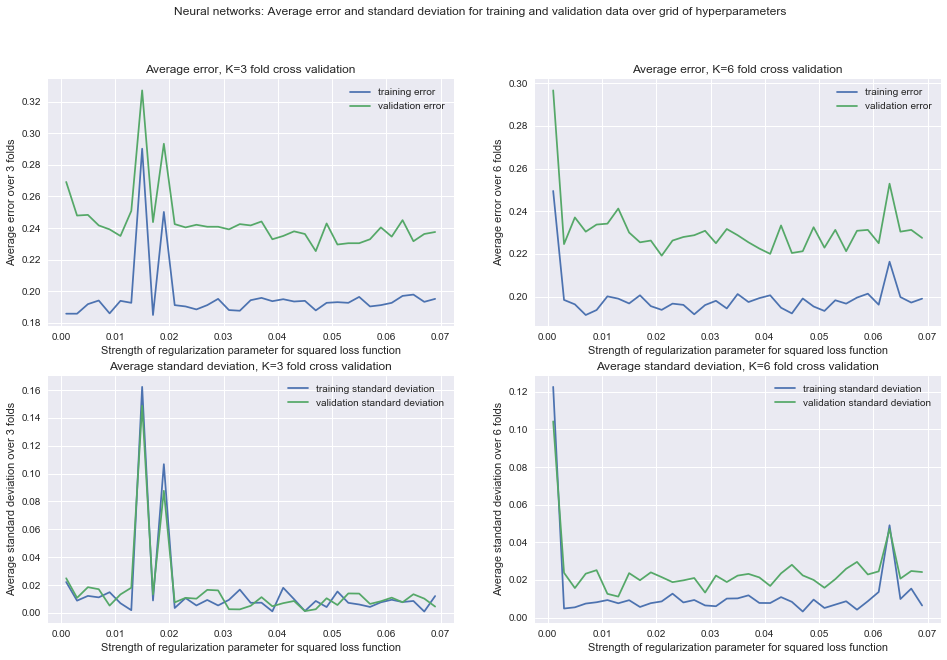

In [59]:
# PLOT (NN)

fig, axs = plt.subplots(2, 2,figsize =(16,10))

for i in [0,1]:
    axs[0,i].plot(alphas, t_NN[i],label='training error')
    axs[0,i].plot(alphas, v_NN[i],label='validation error')

for i in [0,1]:
    axs[1,i].plot(alphas, t_sd_NN[i],label='training standard deviation')
    axs[1,i].plot(alphas, v_sd_NN[i],label='validation standard deviation')



axs[0,0].set_xlabel('Strength of regularization parameter for squared loss function')
axs[0,0].set_ylabel('Average error over 3 folds')
axs[0,0].set_title("Average error, K=3 fold cross validation")

axs[0,1].set_xlabel('Strength of regularization parameter for squared loss function')
axs[0,1].set_ylabel('Average error over 6 folds')
axs[0,1].set_title("Average error, K=6 fold cross validation")

axs[1,0].set_xlabel('Strength of regularization parameter for squared loss function')
axs[1,0].set_ylabel('Average standard deviation over 3 folds')
axs[1,0].set_title("Average standard deviation, K=3 fold cross validation")

axs[1,1].set_xlabel('Strength of regularization parameter for squared loss function')
axs[1,1].set_ylabel('Average standard deviation over 6 folds')
axs[1,1].set_title("Average standard deviation, K=6 fold cross validation")



fig.suptitle("Neural networks: Average error and standard deviation for training and validation data over grid of hyperparameters")

for i in [0,1]:
    for j in [0,1]:
        axs[i,j].legend()

plt.savefig('NN_embed.png')
plt.show()

In [60]:
# THIRD MODEL: decision tree

from sklearn.tree import DecisionTreeClassifier

depths = [x for x in range(50,1050,50)]

# Round 1

loss_1 = []
for t in range(len(x_3)):

    data_x = x_3.copy()
    data_y = y_3.copy()

    v_x = data_x.pop(t)
    v_y = data_y.pop(t)

    tr_x = np.concatenate(data_x)
    tr_y = np.concatenate(data_y)

    train_list = []
    valid_list = []

    for d in depths:

        tree = DecisionTreeClassifier(criterion='entropy',max_depth=d)
        tree_fit = tree.fit(tr_x,tr_y)

        tree_train_predict = tree_fit.predict(tr_x)
        tree_valid_predict = tree_fit.predict(v_x)

        tr_loss = sklearn.metrics.zero_one_loss(tr_y,tree_train_predict)
        v_loss = sklearn.metrics.zero_one_loss(v_y,tree_valid_predict)

        train_list.append(tr_loss)
        valid_list.append(v_loss)



    loss_list = [train_list,valid_list]
    loss_1.append(loss_list)


loss_obj = zip(*loss_1)
loss_list = list(loss_obj)

t_loss = list(zip(*loss_list[0]))
v_loss = list(zip(*loss_list[1]))

t_avg_3 = []
t_std_3 = []
for i in t_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    t_avg_3.append(a)
    t_std_3.append(b)

v_avg_3 = []
v_std_3 = []
for i in v_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    v_avg_3.append(a)
    v_std_3.append(b)





# Round 2

loss_2 = []
for t in range(len(x_6)):

    data_x = x_6.copy()
    data_y = y_6.copy()

    v_x = data_x.pop(t)
    v_y = data_y.pop(t)

    tr_x = np.concatenate(data_x)
    tr_y = np.concatenate(data_y)

    train_list = []
    valid_list = []

    for d in depths:

        tree = DecisionTreeClassifier(criterion='entropy',max_depth=d)
        tree_fit = tree.fit(tr_x,tr_y)

        tree_train_predict = tree_fit.predict(tr_x)
        tree_valid_predict = tree_fit.predict(v_x)

        tr_loss = sklearn.metrics.zero_one_loss(tr_y,tree_train_predict)
        v_loss = sklearn.metrics.zero_one_loss(v_y,tree_valid_predict)

        train_list.append(tr_loss)
        valid_list.append(v_loss)

    loss_list = [train_list,valid_list]
    loss_2.append(loss_list)

loss_obj = zip(*loss_2)
loss_list = list(loss_obj)

t_loss = list(zip(*loss_list[0]))
v_loss = list(zip(*loss_list[1]))

t_avg_6 = []
t_std_6 = []
for i in t_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    t_avg_6.append(a)
    t_std_6.append(b)

v_avg_6 = []
v_std_6 = []
for i in v_loss:
    a = statistics.mean(i)
    b = statistics.stdev(i)
    v_avg_6.append(a)
    v_std_6.append(b)

t_tree = [t_avg_3,t_avg_6]
t_sd_tree = [t_std_3,t_std_6]

v_tree = [v_avg_3,v_avg_6]
v_sd_tree = [v_std_3,v_std_6]

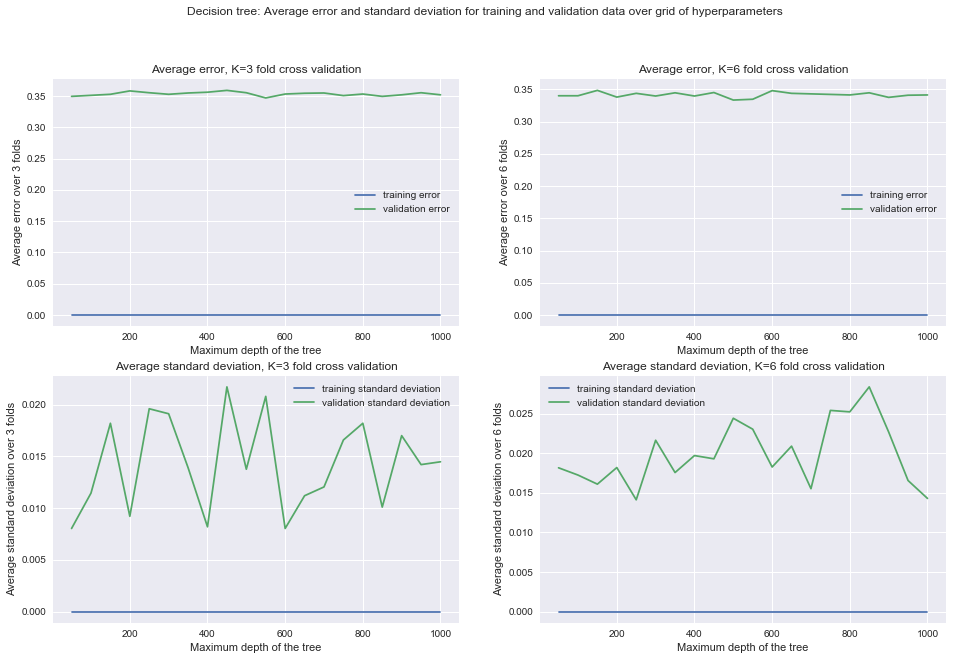

In [61]:
# PLOT (decision tree)

fig, axs = plt.subplots(2, 2,figsize =(16,10))

for i in [0,1]:
    axs[0,i].plot(depths, t_tree[i],label='training error')
    axs[0,i].plot(depths, v_tree[i],label='validation error')

for i in [0,1]:
    axs[1,i].plot(depths, t_sd_tree[i],label='training standard deviation')
    axs[1,i].plot(depths, v_sd_tree[i],label='validation standard deviation')



axs[0,0].set_xlabel('Maximum depth of the tree')
axs[0,0].set_ylabel('Average error over 3 folds')
axs[0,0].set_title("Average error, K=3 fold cross validation")

axs[0,1].set_xlabel('Maximum depth of the tree')
axs[0,1].set_ylabel('Average error over 6 folds')
axs[0,1].set_title("Average error, K=6 fold cross validation")

axs[1,0].set_xlabel('Maximum depth of the tree')
axs[1,0].set_ylabel('Average standard deviation over 3 folds')
axs[1,0].set_title("Average standard deviation, K=3 fold cross validation")

axs[1,1].set_xlabel('Maximum depth of the tree')
axs[1,1].set_ylabel('Average standard deviation over 6 folds')
axs[1,1].set_title("Average standard deviation, K=6 fold cross validation")



fig.suptitle("Decision tree: Average error and standard deviation for training and validation data over grid of hyperparameters")

for i in [0,1]:
    for j in [0,1]:
        axs[i,j].legend()

plt.savefig('tree_embed.png')
plt.show()

In [62]:
# finding the best model
# first element of each list by model + train/valid is 3 fold, second is 6 fold

log_min_t = [min(t_log[0]),min(t_log[1])]
log_min_v = [min(v_log[0]),min(v_log[1])]
log_min_flip_t = [ v_log[0][t_log[0].index(log_min_t[0])] , v_log[1][t_log[1].index(log_min_t[1])] ] 
log_min_flip_v = [ t_log[0][v_log[0].index(log_min_v[0])] , t_log[1][v_log[1].index(log_min_v[1])] ] 

NN_min_t = [min(t_NN[0]),min(t_NN[1])]
NN_min_v = [min(v_NN[0]),min(v_NN[1])]
NN_min_flip_t = [ v_NN[0][t_NN[0].index(NN_min_t[0])] , v_NN[1][t_NN[1].index(NN_min_t[1])] ] 
NN_min_flip_v = [ t_NN[0][v_NN[0].index(NN_min_v[0])] , t_NN[1][v_NN[1].index(NN_min_v[1])] ]

tree_min_t = [min(t_tree[0]),min(t_tree[1])]
tree_min_v = [min(v_tree[0]),min(v_tree[1])]
tree_min_flip_t = [ v_tree[0][t_tree[0].index(tree_min_t[0])] , v_tree[1][t_tree[1].index(tree_min_t[1])] ] 
tree_min_flip_v = [ t_tree[0][v_tree[0].index(tree_min_v[0])] , t_tree[1][v_tree[1].index(tree_min_v[1])] ]

In [63]:
# finding the best model

log_min_t = [min(t_log[0]),min(t_log[1])]
log_min_v = [min(v_log[0]),min(v_log[1])]
log_min_flip_t = [ v_log[0][t_log[0].index(log_min_t[0])] , v_log[1][t_log[1].index(log_min_t[1])] ] 
log_min_flip_v = [ t_log[0][v_log[0].index(log_min_v[0])] , t_log[1][v_log[1].index(log_min_v[1])] ] 

NN_min_t = [min(t_NN[0]),min(t_NN[1])]
NN_min_v = [min(v_NN[0]),min(v_NN[1])]
NN_min_flip_t = [ v_NN[0][t_NN[0].index(NN_min_t[0])] , v_NN[1][t_NN[1].index(NN_min_t[1])] ] 
NN_min_flip_v = [ t_NN[0][v_NN[0].index(NN_min_v[0])] , t_NN[1][v_NN[1].index(NN_min_v[1])] ]

tree_min_t = [min(t_tree[0]),min(t_tree[1])]
tree_min_v = [min(v_tree[0]),min(v_tree[1])]
tree_min_flip_t = [ v_tree[0][t_tree[0].index(tree_min_t[0])] , v_tree[1][t_tree[1].index(tree_min_t[1])] ] 
tree_min_flip_v = [ t_tree[0][v_tree[0].index(tree_min_v[0])] , t_tree[1][v_tree[1].index(tree_min_v[1])] ]




# seeing results for all models
print("LOGISTIC")
print(f"min training error, 3 folds {log_min_t[0]:.4f} | validation {log_min_flip_t[0]:.4f}")
print(f"min training error, 6 folds {log_min_t[1]:.4f} | validation {log_min_flip_t[1]:.4f}")
print(f"min validation error, 3 folds {log_min_v[0]:.4f} | training {log_min_flip_v[0]:.4f}")
print(f"min validation error, 6 folds {log_min_v[1]:.4f} | training {log_min_flip_v[1]:.4f}")

print("\n")

print("NN")
print(f"min training error, 3 folds {NN_min_t[0]:.4f} | validation {NN_min_flip_t[0]:.4f}")
print(f"min training error, 6 folds {NN_min_t[1]:.4f} | validation {NN_min_flip_t[1]:.4f}")
print(f"min validation error, 3 folds {NN_min_v[0]:.4f} | training {NN_min_flip_v[0]:.4f}")
print(f"min validation error, 6 folds {NN_min_v[1]:.4f} | training {NN_min_flip_v[1]:.4f}")

print("\n")

print("TREE")
print(f"min training error, 3 folds {tree_min_t[0]:.4f} | validation {tree_min_flip_t[0]:.4f}")
print(f"min training error, 6 folds {tree_min_t[1]:.4f} | validation {tree_min_flip_t[1]:.4f}")
print(f"min validation error, 3 folds {tree_min_v[0]:.4f} | training {tree_min_flip_v[0]:.4f}")
print(f"min validation error, 6 folds {tree_min_v[1]:.4f} | training {tree_min_flip_v[1]:.4f}")

# eyeball best model
# when discussing best model, discuss (1) minimum validation error, (2) min training error
# make sure to also discuss their graphs for standard deviations

LOGISTIC
min training error, 3 folds 0.2087 | validation 0.2242
min training error, 6 folds 0.2119 | validation 0.2196
min validation error, 3 folds 0.2204 | training 0.2104
min validation error, 6 folds 0.2196 | training 0.2119


NN
min training error, 3 folds 0.1850 | validation 0.2437
min training error, 6 folds 0.1913 | validation 0.2304
min validation error, 3 folds 0.2254 | training 0.1879
min validation error, 6 folds 0.2192 | training 0.1937


TREE
min training error, 3 folds 0.0000 | validation 0.3496
min training error, 6 folds 0.0000 | validation 0.3400
min validation error, 3 folds 0.3471 | training 0.0000
min validation error, 6 folds 0.3333 | training 0.0000


In [64]:
# when discussing best model, discuss (1) minimum validation error, (2) min training error
# make sure to also discuss their graphs for standard deviations

In [65]:
# loop over all items in list of reviews - TESTING DATA

test_vectors = []
for r in test_text:
    
    # assemble weight vector
    tokens = nltk.word_tokenize(str.lower(r))
    vector_names = [y[0] for y in d_list_trim if y[0] in tokens]
    tokens = [x for x in vector_names if x in tokens]

    w = [1 for x in range(len(tokens))]
    for j in tokens:
        pos = nltk.pos_tag(j)
        if (pos == 'CC') or (pos == 'IN') or (pos == 'DT'):
            w[tokens.index(j)] = 0.15
        elif j in word_tokenize(string.punctuation) or (j in slang) or (j in stop_list):
            w[tokens.index(j)] = 0.05

    # create weight vector and change weights
    weights = np.divide(np.asarray(w),np.sum(np.asarray(w)))

    # collect embedding vector for each of the tokens

    vectors = [y[1] for y in d_list_trim if y[0] in tokens]
    weighted_vectors = np.multiply(vectors,np.reshape(weights,(len(weights),1)))
    final_vector = np.sum(weighted_vectors, axis=0)
    
    test_vectors.append(final_vector)
    
for x in [x for x,y in enumerate(test_vectors) if np.size(y)!=50]:
    test_vectors[x] = np.zeros(50,)
    
    
    
    
test_embeddings = np.stack(test_vectors)
x_test = test_embeddings

In [66]:
# run best model here

# BEST MODEL: NN:  min validation error, 6 folds

best_hyper = alphas[v_NN[1].index(min(v_NN[1]))]



mlp_sgd = MLPClassifier(
    hidden_layer_sizes=[2],
    activation='logistic',
    alpha=best_hyper, # hyperparameter to vary
    tol=1e-8,
    max_iter = 400,
    solver='lbfgs', batch_size=10,
    learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
    )

NN_fit = mlp_sgd.fit(x_train, y_train)

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [67]:
best_hyper

0.021

In [68]:
# # Load data into file for best classifier
# # Load data into file for best classifier
y_test = NN_fit.predict_proba(x_test)
np.savetxt('yproba1_test_embed.txt', y_test[:, 1])

In [69]:
# TEST THE LOAD
len(np.loadtxt('yproba1_test_embed.txt'))

600

In [70]:
# Looking at mistakes of best classifier
# CHANGE PREDICT BASED ON MODEL YOU NEED
predict = NN_fit.predict(x_train)

from statistics import mean

print(np.unique(x_train_df['website_name'].values.tolist()))

# confusion matrix
print("CONFUSION MATRIX \n")
print(sklearn.metrics.confusion_matrix(y_train,predict))

# df of wrongly predicted 
wrong_predict = x_train_df[y_train != predict]


# length of sentences (summary stats): total, by website count
sent_length = []
for web in np.unique(x_train_df['website_name'].values.tolist()):
    df = wrong_predict[wrong_predict['website_name'] == web]
    sent_length_web = []
    for i in list(df['text'].to_numpy()):
        j = word_tokenize(i)
        length = len(j)
        sent_length_web.append(length)
    sent_length.append(sent_length_web)
    
print("\n LENGTH OF SENTENCES: by website \n")
for i in sent_length:
    print(pd.DataFrame(i).describe())
          
print("\n LENGTH OF SENTENCES: total")
print(pd.DataFrame([item for sublist in sent_length for item in sublist]).describe())



# length of words (summary stats): total, by website count
word_length = []
for web in np.unique(x_train_df['website_name'].values.tolist()):
    df = wrong_predict[wrong_predict['website_name'] == web]
    
    word_length_web = []
    for i in list(df['text'].to_numpy()):
        j = word_tokenize(i)
        avg = mean([len(k) for k in j])
        word_length_web.append(avg)
    
    word_length.append(word_length_web)
    
print("\n AVERAGE LENGTH OF WORDS: by website \n")
for i in word_length:
    print(pd.DataFrame(i).describe())
          
print("\n AVERAGE LENGTH OF WORDS: total")
print(pd.DataFrame([item for sublist in word_length for item in sublist]).describe())
        



# ratio of common words (same as data cleaning process) to all words: total, by website count
common_ratio = []
for web in np.unique(x_train_df['website_name'].values.tolist()):
    df = wrong_predict[wrong_predict['website_name'] == web]
    
    common_ratio_web = []
    for i in list(df['text'].to_numpy()):
        count = len([x for x in nltk.pos_tag(i) if (x[1] == 'CC') or (x[1] == 'IN') or (x[1] == 'DT')])
        ratio = count/len(word_tokenize(i))
        common_ratio_web.append(ratio)
        
    common_ratio.append(common_ratio_web)
                     
                     
print("\n RATIO OF COMMON WORDS TO ALL WORDS: by website \n")
for i in common_ratio:
    print(pd.DataFrame(i).describe())
          
print("\n RATIO OF COMMON WORDS TO ALL WORDS: total")
print(pd.DataFrame([item for sublist in common_ratio for item in sublist]).describe())

print("\n website analysis")
wrong_predict.groupby('website_name').count()

['amazon' 'imdb' 'yelp']
CONFUSION MATRIX 

[[952 248]
 [261 939]]

 LENGTH OF SENTENCES: by website 

                0
count  180.000000
mean    11.250000
std      7.017834
min      3.000000
25%      5.000000
50%      9.000000
75%     16.000000
max     32.000000
                0
count  159.000000
mean    17.622642
std     10.865506
min      3.000000
25%     10.000000
50%     15.000000
75%     23.500000
max     67.000000
                0
count  170.000000
mean    12.152941
std      6.056941
min      3.000000
25%      7.000000
50%     11.000000
75%     16.000000
max     31.000000

 LENGTH OF SENTENCES: total
                0
count  509.000000
mean    13.542240
std      8.602136
min      3.000000
25%      7.000000
50%     11.000000
75%     18.000000
max     67.000000

 AVERAGE LENGTH OF WORDS: by website 

                0
count  180.000000
mean     3.928978
std      0.793882
min      2.272727
25%      3.400000
50%      3.833333
75%      4.333333
max      7.250000
                0


,text
website_name,
amazon,180
imdb,159
yelp,170
